# Bracket creep

Income tax in Australia is progressive. This means every extra dollar earned over a given threshhold is subject to a higher rate of tax. This leads to the following string of reasoning: getting a pay rise *means* getting placed in a higher tax bracket *means* paying more tax *means* receiving less income (less taxes) had they foregone the pay rise. This reasoning, compelling at a glance, leads to many people to forgo a pay rise. 

This is but one feature of the notion of *bracket creep*. Read about it in words of the Australian Goverment [here](https://www.aph.gov.au/About_Parliament/Parliamentary_Departments/Parliamentary_Budget_Office/Publications/Budget_explainers/Bracket_creep#:~:text=Bracket%20creep%20is%20a%20term,number%20of%20tax%20'brackets').

Now, these people are correct of course in their first impressions: that being placed in a higher tax bracket means they will pay more in tax. Their mistake lies in fixating on only one half of the equation. The higher income they receive offsets any extra tax they would pay. This can be demonstrated empirically. 

There is a slightly more nuanced sense however in which people are correct in *all* of their assertions. But to understand this involves understanding income earned *at the margins*. Knowing that tax is progressive, each extra dollar earned is worth less *on average* than each dollar earned earlier. Hence it is reasonable to ask: 

*is it worth expending the same effort in earning previous dollars to earn this extra dollar?* 

We firstly look at the net income earned, which is income less taxes, and show how being placed in higher brackets does *not* imply taing home less *net* income. Subsequently, we will see how the average return on each dollar nevertheless decreases with every dollar earned, thus begging the above question. 

## Median net income

In the `tax` module one finds the method `netIncome` which passes in an income and returns *net* income, being the income less taxes. A person's *net* income is their cash in the bank. It is the money they can use to spend on whatever they want. The rates of tax on income in Australia can be found [here](https://www.ato.gov.au/rates/individual-income-tax-rates/). 

In [1]:
import tax

From the [Australian Bureau of Statistics](https://www.abs.gov.au/statistics/labour/earnings-and-working-conditions/personal-income-australia/2014-15-2018-19) the median income for employed Australians during the year 2018-2019 was `51 389`. Their median *net income* was:

In [2]:
round(tax.netIncome(51389), 2)

44220.57

And so `44 220.57` is the number of Australian dollars that the median income earner in Australia pocketed during the year 2018-2019.

### Income from net income

In reverse, suppose we know the *net* income `net`. Is it then possible to calculate what the income, `income`, was such that `netIncome(income)` is the given *net* income `net`? That is, is it possible to invert the function `netIncome`? 

The difference between income and *net* income is of course the tax paid. If it is possible to calculate income from *net* income, thereby inverting `netIncome`, it will be possible to calculate the tax paid.

The method `netIncomeInverse` in the `tax` module is the desired inverse. Suppose instead that the quoted figure `51 389` above is actually the *net* median income. What was the median income then? Calling `netIncomeInverse`:

In [3]:
round(tax.netIncomeInverse(51389), 2)

62008.89

And so, were the median income earner to *pocket* `51 389` Australian dollars, they would have to have earned an income of `62 008.89`. 

**Note.** To see that `netIncomeInverse` really is an inverse, it would have to satisfy `netIncomeInverse(netIncome(x)) = x` for any income `x`. This can be proved by directly inspecting the calculation used in the method `netIncomeInverse`. The following code cell gives a demonstration for some sample incomes.

In [4]:
sample_incomes = [
    100, 18000, 37000, 66000, 130000, 200000, 10**6
]

for income in sample_incomes:
    net = tax.netIncome(income)
    inverse = tax.netIncomeInverse(net)
    print(f"the net income is {net}. The (gross) income, or inverse, is {round(inverse, 2)}.")

the net income is 100. The (gross) income, or inverse, is 100.
the net income is 18000. The (gross) income, or inverse, is 18000.
the net income is 33428.0. The (gross) income, or inverse, is 37000.0.
the net income is 54083.0. The (gross) income, or inverse, is 66000.0.
the net income is 96833.0. The (gross) income, or inverse, is 130000.0.
the net income is 139333.0. The (gross) income, or inverse, is 200000.0.
the net income is 579333.0. The (gross) income, or inverse, is 1000000.0.


### Tax paid

As mentioned earlier, an important feature of having the inverse `netIncomeInverse` is the ability to calculate the tax paid given a *net* income. The `taxPaid` method in the `tax` module can be called on any  income, net or gross, to return the tax paid. 

On the median Australian income of `51 389` we have:

In [6]:
tax.taxPaidNet(51389)

10619.89

In [7]:
tax.taxPaidGross(51389)

7168.43

In the first instance, the median income `51 389` is the *net* income. The tax paid by the median income earner is `10 619.89`. 

In the second instance, the median income is `51 389` *gross* income. The tax paid by the median income earner in this case is less. It is `7 168.43`. 

## Bracket creep for net income

In Australia there are *five* tax brackets. Within each tax bracket, the tax rate is a fixed percentage. To see that getting placed in a higher tax bracket does *not* lead to less net income, it suffices to look at incomes on either side of the each tax bracket and calculate the net income with `netIncome`. 

That is, we need to look at four pairs of incomes. With the instance `tax_brackets` from the `tax` module, these income pairs are:

In [8]:
import math

for i in tax.tax_brackets:
    if i != 0 and tax.tax_brackets[i] != math.inf:
        print(f"{tax.tax_brackets[i]} versus {tax.tax_brackets[i] + 1}")

18200 versus 18201
45000 versus 45001
120000 versus 120001
180000 versus 180001


And so, if you were on an income on the *left* of the above two columns of numbers, a pay rise of a single dollar would place you in a higher tax bracket. This means you pay more in tax. But does it mean you end up pocketing less money overall? 

With `netIncome`, the above incomes result in the following net incomes:

In [9]:
for i in tax.tax_brackets:
    if i != 0 and tax.tax_brackets[i] != math.inf:
        print(f"{tax.netIncome(tax.tax_brackets[i])} versus {tax.netIncome(tax.tax_brackets[i] + 1)}")
        

18200 versus 18200.81
39908.0 versus 39908.68
90533.0 versus 90533.63
128333.0 versus 128333.55


The numbers on the right are larger than their partner numbers on the left. Indeed, taking the difference `right - left` gives:

In [10]:
for i in tax.tax_brackets:
    if i != 0 and tax.tax_brackets[i] != math.inf:
        print(round(tax.netIncome(tax.tax_brackets[i] + 1) - tax.netIncome(tax.tax_brackets[i]), 2))

0.81
0.68
0.63
0.55


All the numbers above are greater than zero (in fact, they are the complements of the tax rates for the respective tax bracket, i.e., the *marginal* tax rates). Hence, being placed in a higher tax bracker does *not* imply less income overall. 

Indeed, unsurprisingly, it results in *more* net income overall.

## Bracket creep on the margin

A more interesting question is now: 

*is it worth putting in the **effort** to earn an extra dollar of income if it places you in a higher tax bracket?* 

The motivation behind asking this question lies in the observation: getting placed in a higher bracket leads to less return on effort expended in earning the next dollar compared to that expended on earning the previous dollars.

This can be highlighted through in the following example.

### Example

#### In the first bracket

On an income of `18 200`, each dollar earned less than `18 200` carried no tax. That is, each dollar less than `18 200` is worth `1` *net* dollars. The effort in earning one more dollar however puts you in the tax bracket carrying `0.19` tax. That is, the dollar sending `18 200` to `18 201` is worth `0.81` *net* dollars. This dollar is worth less than any of the previous `18 200` dollars. 

*Is earning it worth the same effort?* 

This question might seem silly in this tax bracket. The exigencies of the economy may be motivation enough to earn the `18 200`-th dollar. It becomes more interesting at higher tax brackets however. 

#### In the last bracket

On an income of `180 000`, the *average tax rate* is:

In [11]:
round(tax.netIncome(180000)/180000, 2)

0.71

Hence, the return on every dollar earned under `180 000` is, on average, `0.71` *net* dollars. 

```{note}

It is imperative to use "average rates" since the rate of tax is not constant. It is progressive and so changes as we progress through the tax brackets.

```


The extra dollar sending `180 000` to `180 001` carries a tax of `0.45`. Hence, it is only worth `0.55` *net* dollars. Much less than the average. 

*Is it worth putting in the same effort to earn the `180 000`-th dollar?*

Now to add a bit more context to this question, note that `0.71` is greater than the *net* value of each dollar in the tax bracket `120 000` to `180 000`. From the tax rates in the instance `tax_rates`, each dollar in this bracket carries a tax of `0.37`. This means its value is `0.63` *net* dollars. Compared to the average of `0.71`, `0.63` is as a percentage:

In [12]:
percentage = round((0.63/0.71)*100, 2)
print(f"{percentage} percent of {0.71}")

88.73 percent of 0.71


What does this mean? Firstly that the `179 999`-th dollar is worth `88.73` percent of the *average dollar* under `180 000`. That is, each extra dollar earned is losing value. 

The *premium* on earning the `180 000`-th dollar is `11.27` percent. That is, in order to earn this dollar, one is willing earn it at an `11.27` percent *loss* in average value. Similarly, concerning the `180 000`-th dollar, this is earned at an even greater loss. As it is worth `0.55` *net* dollars we find as a percentage of the average:

In [13]:
percentage = round((0.55/0.71*100), 2)
print(f"{percentage} percent of {0.71}")

77.46 percent of 0.71


The premium on the `180 001`-th is thus `22.54` percent. Compared to the `179 999`-th dollar, the premium has increased by:

In [14]:
premium = 22.54/11.27 - 1
premium = 100*premium
print(f"{round(premium, 2)} percent.")

100.0 percent.


That is, the premium on earning the `180 000`-th dollar has doubled compared to earning the `179 999`-th dollar. This is directly due to having progressed to a new tax bracket. And so it is worth asking more earnestly:

*is this increase in premium worth putting in the effort to earn the `180 000`-th dollar?*

This question and the preceeding calculations are precursors to the notion of marginal utility in classical economics.

## Marginal value


### The $x$-th dollar

We begin with establishing the following notion of "the $x$-th dollar".

```{admonition} Definition.

*The dollar sending $x \mapsto x + 1$ will be referred to as the **$x$-th dollar**.*
```

The $x$-th dollar is worth `(1 - tax_rate)`-many *net* dollars. That is, depending on the tax bracket in which the income $x$ falls, that's the rate of tax carried by the $x$-th dollar. 

Traditionally, the *marginal value* is the value of an additional unit of output. In the present case, the marginal value of the $x$-th dollar is precisely `(1 - tax_rate)`. The following code passes in an income $x$ and returns the *marginal value* of the $x$-th dollar.

In [15]:
def marginalValue(income):
    for i in tax.tax_brackets:
        if income <= tax.tax_brackets[i]:
            return 1-tax.tax_rates[i]

### The average return

As with marginal value, at a given level of income we can also form the *average return*. On an income $x$, the *average return* for each dollar earned less than $x$ is given by

$$
\begin{align}
\mbox{aveReturn}(x) = \frac{\mbox{netIncome$(x)$}}{x}.
\end{align}
$$



In [16]:
def aveReturn(income):
    return tax.netIncome(income)/income

```{note}

In the investopedia article [here](https://www.investopedia.com/terms/m/marginaltaxrate.asp), what we have called the average is referred to as the *effective* tax rate.

```

## Plots

### The average return

As suggested above, the average return on each dollar decreases with each dollar earned. In the following plot, the $x$-axis parametrises income. The $y$-axis the average return on a dollar of income.

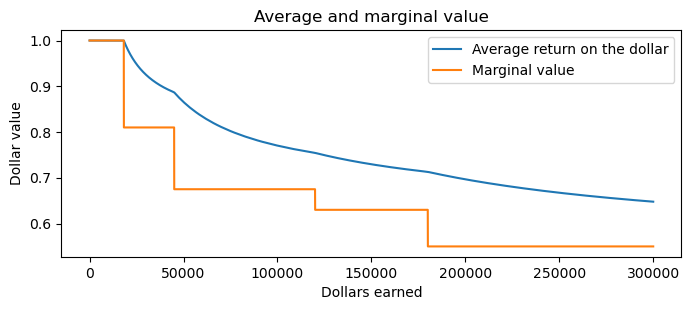

In [17]:
import matplotlib.pyplot as plt


incomes = [i for i in range(1, 300001)]
average_returns = [aveReturn(i) for i in range(1, 300001)]
marginal_values = [marginalValue(i) for i in range(1, 300001)]


plt.figure(figsize = (8, 3), dpi=100)
plt.title("Average and marginal value")

plt.xlabel("Dollars earned")
plt.ylabel("Dollar value")

plt.plot(incomes, average_returns, label="Average return on the dollar")
plt.plot(incomes, marginal_values, label="Marginal value")

plt.legend()
plt.show()

```{note}

The marginal value curve is consistently less than the average value. This is to be expected since the average is falling. If the average were rising, then marginal value should be greater than average value. The two values coincide when the average value is constant, as can be seen for incomes in the first tax bracket, i.e., in the range `0` to `18 200`.
```



Since the marginal tax rate is constant for all incomes $x$ greater than `180 000`, the average value curve will asymptote to this line. In other words, the dollar at infinity will be worth `0.55` *net* dollars. In particular, the Australian dollar will *always* be worth more than `0.55` *net* dollars. The marginal value of an Australian dollar will never be worth more than the average however.


## More on average and marginal values


### Premium on the marginal dollar

We have seen that the marginal value of an Australian dollar will always be less than the average. What is the *magnitude* of this difference? In inspecting the magnitude we will be able to clearly see the impact of  progressive taxation.

At an income level $x$, let $\mathfrak m_x$ denote the marginal value of the $x$-th dollar and $\alpha_x$ the average *net* value value of every dollar less than $x$. We have demonstrated that $\mathfrak m_x \leq \alpha_x$ for all $x$, with equality if and only if $0\leq x\leq 18~200$, i.e., if the income $x$ falls in the first tax bracket. 

```{admonition} Definition

The *premium* on $x$-th dollar, denoted $|x|$, is the percentage difference between $\mathfrak m_x$ and $\alpha_x$ as a percentage of $\alpha_x$. 
```

The premium is calculated as

$$
\begin{align}
\frac{|x|}{100}
=
\frac{\alpha_x - \mathfrak m_x}{\alpha_x}
\end{align}
$$

```{note}

Since $\mathfrak m_x \leq \alpha_x$, the premium $|x|$ will always be positive. If it is negative, then the marginal value is higher than the average value. If the premium were negative, we might instead refer to it as a "discount".
```





In [18]:
def premium(income):
    average = aveReturn(income)
    marginal = marginalValue(income)
    percentage = (average - marginal)/average
    percentage = 100*percentage
    return round(percentage, 2)

### Plot of the premium

From the earlier plot, see that as $x$ approaches a new tax bracket the values $\alpha_x$ and $\mathfrak m_x$ come closer. Then on progession through to a new tax bracket they suddenly jump apart, as though repelled by a new force in physics (c.f., the strong nuclear force). 

This can be seen directly in the following plot.

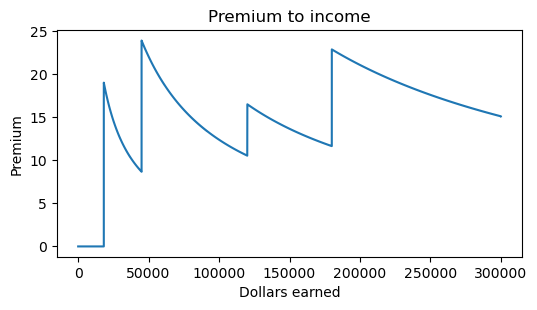

In [19]:
incomes = [i for i in range(1, 300001)]
premiums = [premium(i) for i in range(1, 300001)]

plt.figure(figsize=(6, 3), dpi=100)
plt.plot(incomes, premiums)

plt.title("Premium to income")
plt.ylabel("Premium")
plt.xlabel("Dollars earned")

# plt.legend()
plt.show()

### Further remarks  

The above plot reveals the following. Along the $x$-axis we find income while the $y$-axis records the premium of the marginal dollar earned. It addresses the question: 

*at what premium does the marginal dollar trade relative to the average?* 

The tax-free threshhold is at the income level of `18 200`. That is, there is no tax paid on income less than `18 200`. Accordingly, there is no premium on the marginal dollar. This changes immediately for the `18 200`-th dollar. The premium on this dollar is `0.19`, or `19` percent. Since the marginal value is constant within tax brackets, the premium rapidly decreases until it hits the next threshhold. 

An interesting point to observe is that, with each threshhold passed, the premium increases "on average" for incomes under `300 000`. Any marginal dollar less than `18 200` carries the lowest premium, being *zero*. The marginal dollar carrying the highest premium is the `45 000`-th dollar. It carries a premium of:

In [20]:
print(f"{premium(45001)} percent.")

23.89 percent.


Where the median income earner is concerned, recall that they earn `51 389`. Their premium on earning the `51 389`-th dollar is:

In [21]:
print(f"{premium(51390)} percent.")

21.56 percent.


The dollar at infinity will be worth `0.55` *net* dollars. Its premium is zero since, at infinity, the marginal dollar value will coincide with the average value. Hence, continuing along the income level ($x$-axis) to infinity, the premium on the marginal dollar limits to zero.

## Toward applications

This article began with the question of whether an income earner should forgo a pay rise. There is no reason to do so since, on *net* dollars, they will always be earning more. A more interesting question is whether it is *worth* working for a pay rise. Marginal analysis is tailored toward address questions such as these. 

For a given income level $x$, suppose $E(x)$ is the total amount of "effort" expended in earning $x$. The unitised effort, $E_x$, is then

$$
\begin{align}
E_x
=
\frac{E(x)}{x}.
\end{align}
$$

Comparing unitised effort with the marginal value and average return given a basis on which to decide whether to working for a pay rise.

```{admonition} Example

To see that a pay rise should *always* be accepted if it comes for free, suppose the income earner earns $x$ amount. The total effort expended in earning $x$ is $E(x)$. With a pay rise of $y$ amount, the earner earns a new income of $x + y$. If it came for free, then $E(x + y) = E(x)$. Hence, effort expended *per dollar* is

$$
\begin{align}
E_{x+ y} 
=
\frac{E(x + y)}{x + y}
=
\frac{E(x)}{x + y} 
< 
\frac{E(x)}{x}
=
E_x.
\end{align}
$$

As $E_{x + y} < E_x$, see that the income earner will earn a greater income with *less* average effort expended. Hence, they should accept the pay rise if it is free.

```

### Decision basis criteria

The previous example of the free pay rise illustrates an important, general principle:

*if the average effort per dollar decreases with an increase in income, it is worth working for the extra dollar(s) in the income increase.*

Other important factors to employ in making a decision are comparisons with the marginal and average value. There are two criteria identified here which an income earner can use to decide whether an extra dollar of income is worth earning.

```{admonition} Strong criterion

On an income $x$:

- if $E_x < \mathfrak m_x$, then the $x$-th dollar is worth the effort to earn it;
- if $E_x > \alpha_x$, the $x$-th dollar is *not* worth the effort.
```

In Australia's progressive taxation system we know that $\mathfrak m_x \leq \alpha_x$ for all incomes $x$. Under the Strong Criterion, it *not* suffient for the average effort in earning income $E_x$ to be less than the average return on the dollar. It must be less than the *marginal value* $\mathfrak m_x$. 

A weaker criterion is the following, based only on the premium.


```{adnomition} Weak criterion

Let $E_x$ be the unit effort expended in generated a dollar of income less than $x$. Like the premium $|x|$,  the *effort premium* $|E_x|$ is given by the difference of $E_x$ to the average $\alpha_x$ relative to $\alpha_x$, i.e., the percentage

$$
\begin{align}
\frac{|E_x|}{100}
=
\frac{\alpha_x - E_x}{\alpha_x}.
\end{align}
$$

Then:

- if $|E_x| < |x|$, it is worth earning the $x$-th dollar;
- if $|E_x| > |x|$ is is *not* worth earning the $x$-th dollar.

```


```{Note} 

The Weak Criterion is equivalent to the Strong criterion for incomes $x$ such that $\mathfrak m_x = \alpha_x$.
```

With the above two criteria, see that there are two types of *optimal* incomes that an income earner ought to vie for. These the Strong Optimal Income and Weak Optimal Income defined below.

```{admonition} Definition

The **Strong Optimal Income** is the income $x$ such that $E_x = \alpha_x$. The **Weak Optimal Income** is the income $x$ such that $E_x = \mathfrak m_x$.

```

At any Strong Optimal Income, it is worth earning the $x$-th dollar in the Weak Criterion. At any Weak Optimal Income, it is not necessarily true the $x$-th dollar is worth earning according to the Strong Criterion.


### Effort components 

If the effort per dollar $E_x$ at any income $x$ is known, then the criteria listed above can be readily applied and a decision on whether to earn the $x$-th dollar is straightforward. Much difficulty lies therefore in understanding what comprises $E_x$. 


The construction of $E_x$ for all $x$ can be highly varied and person-specific. There are nevertheless some generic features one can identify that are reasonably applicable to all people. Two of these are:

- the expenses involved in generating the income $x$; 
- expenses expected to be covered over a time frame in the future.

Let $\epsilon_x$ denote the averaged expense on earning a *net* dollar of income under $x$. This is the first of the two components above. The difference $E_x - \epsilon_x$ is the "excess", to be understood analogously to *net profit*. Classically, what is the purpose of net profit? From the viewpoint of corporations, net profit can be understood as defining a company's *going concern* for a period of time in the future. 

The expenses $\epsilon_x$ are easier to estimate or record both for an individual or corporation. A person or corporation's going concern is however more subjective. Determining this allows for getting a more informed  answer as to whether it is worth the effort to earn the $x$-th dollar.

-- Kowshik Bettadapura